In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import networkx as nx 
import matplotlib.pyplot as plt
import itertools as it
import seaborn as sns
import pickle
import datetime
import sklearn as sk
from sklearn.linear_model import LinearRegression as LinReg

plt.rcParams["figure.figsize"] = (16,9)

#importiamo le cose utili

In [ ]:
'''!pip install pandas==1.4.1'''
pd.__version__

'1.3.5'

In [ ]:
#conn = pd.read_csv('connections.csv')
conn = pd.read_csv('/content/drive/MyDrive/Esperimenti/test2.csv')
conn['time'] =  pd.to_datetime(conn['time'],utc=True)
conn = conn.sort_values(by="time")
conn.dropna(inplace=True)
conn.reset_index(drop=True,inplace=True)
scan = conn.scanner.unique() #tutti gli scanner
adv = conn.advertiser.unique() #tutti gli advertiser
print(scan)
conn.head()
#importiamo i db e li puliamo

[4723377902654971775 7131565301232367964 7473402457974956539]


,time,scanner,advertiser,power,rssi
0,2022-02-23 10:45:42+00:00,4723377902654971775,7131565301232367964,-7,-94
1,2022-02-23 10:45:43+00:00,4723377902654971775,7131565301232367964,-7,-92
2,2022-02-23 10:45:44+00:00,4723377902654971775,7131565301232367964,-7,-100
3,2022-02-23 10:45:44+00:00,4723377902654971775,7131565301232367964,-7,-93
4,2022-02-23 10:45:44+00:00,4723377902654971775,7131565301232367964,-7,-97


In [ ]:
'''for id in scan:
  conn.loc[conn['scanner']==id].groupby('time').rssi.count().plot()
  plt.title(id)
  plt.show()''' #plot banale RSSI

"for id in scan:\n  conn.loc[conn['scanner']==id].groupby('time').rssi.count().plot()\n  plt.title(id)\n  plt.show()"

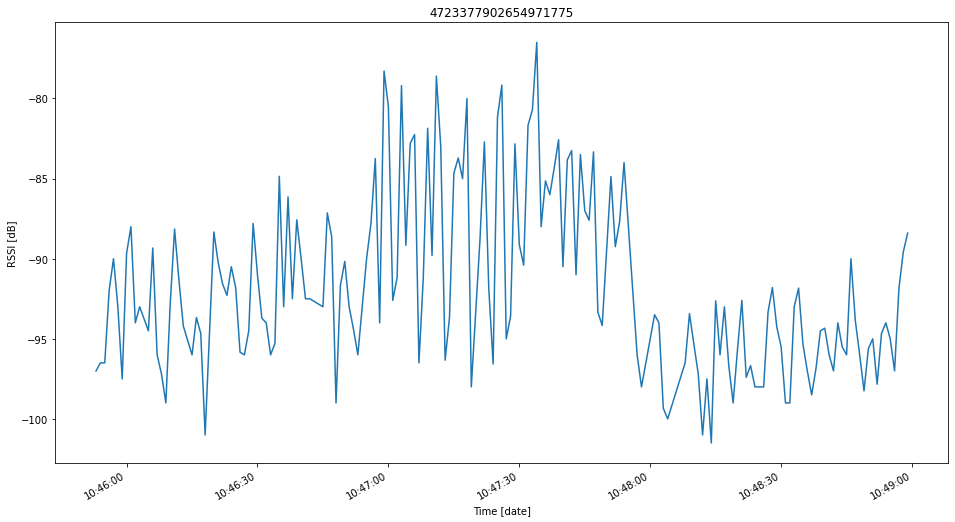

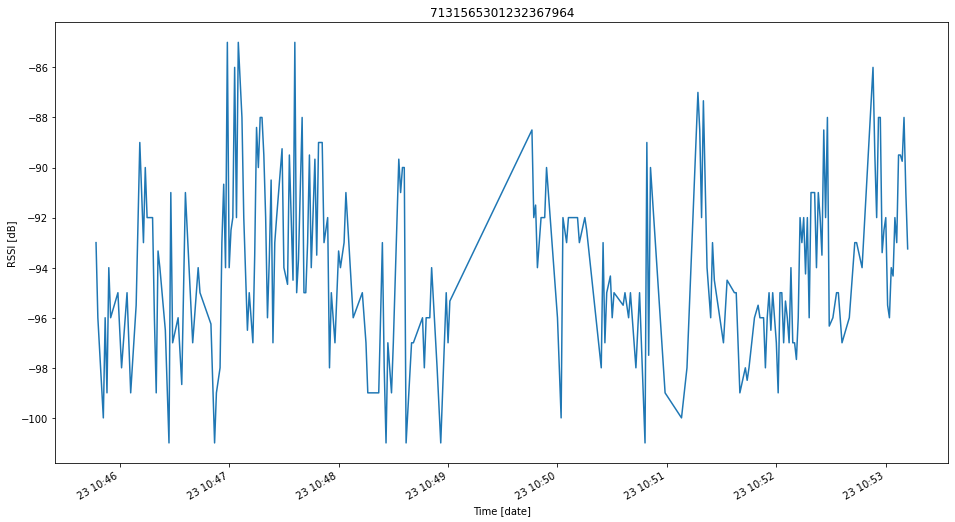

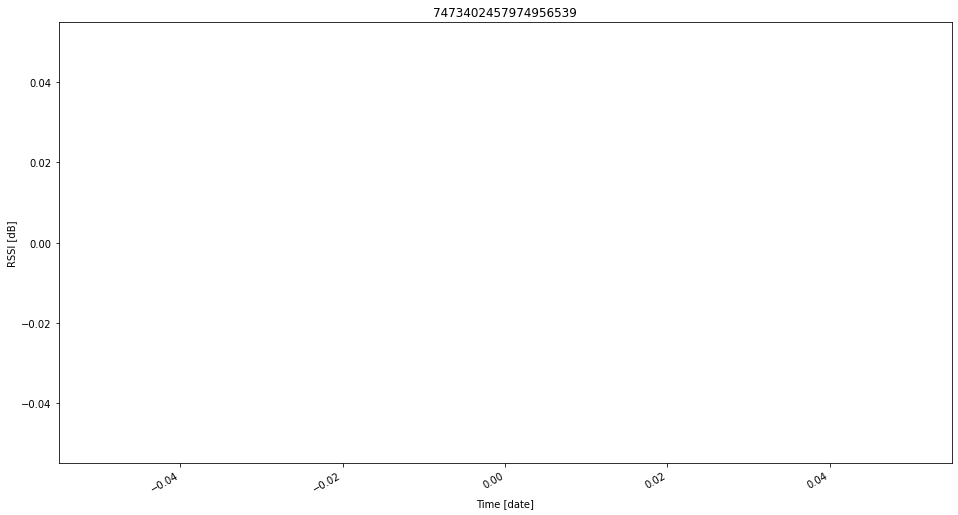

In [ ]:
center = 7473402457974956539 #LG centrale nel test_1
# qui plottiamo i RSSI, rispetto al telefono centrale
for id in scan:
  conn.loc[(conn['scanner']==id)&(conn['advertiser']==center)].groupby('time').rssi.mean().plot()
  plt.xlabel('Time [date]')
  plt.ylabel('RSSI [dB]')
  plt.title(id)
  plt.show()

In [ ]:
df_pair = pd.DataFrame(index=scan, columns=adv)
#sezione in cui facciamo le coppie, se nello stessa finestra 1sec

for id in scan: #scelgo uno scanner
  print(id) #lista di advertiser che rilevato
  adv2 = conn.loc[(conn.scanner==id)].dropna().advertiser.unique()

  for ad in adv2:
    # vado a vedere l'intersezioen di tempo
    A , B = [] , []
    conA = conn.loc[(conn.scanner==id)&(conn.advertiser==ad)].dropna()
    conB = conn.loc[(conn.scanner==ad)&(conn.advertiser==id)].dropna()
    cross_time = pd.Series(np.intersect1d(conA.loc[:,'time'], conB.loc[:,'time']))
    
    if len(cross_time)>0: # counter
      print(ad,' - ',len(cross_time))

      for t in cross_time: # per ogni istanza di tempo, mettiamo i valori di RSSI medi
        A.append(conA.loc[conA.time==t].rssi.median())
        B.append(conB.loc[conB.time==t].rssi.median())
      
      df_pair.loc[id, ad] = (A,B)

  print('done')

#df_pair.dropna(axis=1,how='all',inplace=True)
#df_pair.dropna(axis=0,how='all',inplace=True)

4723377902654971775
7131565301232367964  -  187
7473402457974956539  -  143
done
7131565301232367964
4723377902654971775  -  187
7473402457974956539  -  203
done
7473402457974956539
7131565301232367964  -  203
4723377902654971775  -  143
done


[-89.0, -97.0, -85.0, -90.5, -89.0, -88.0, -85.0, -98.5, -94.5, -89.0, -85.0, -85.5, -87.0, -87.0, -88.0, -90.0, -97.0, -93.0, -86.5, -87.5, -89.0, -90.5, -92.5, -94.0, -97.5, -93.5, -91.5, -88.0, -89.0, -95.0, -85.0, -90.5, -87.0, -92.0, -90.0, -97.0, -96.5, -94.5, -85.5, -91.0, -86.0, -87.5, -94.0, -88.5, -95.0, -97.0, -96.5, -89.0, -89.0, -86.5, -88.0, -85.0, -94.0, -97.0, -98.0, -92.0, -86.5, -86.0, -83.5, -93.0, -85.5, -88.0, -96.0, -91.5, -87.0, -85.5, -82.0, -89.0, -93.0, -95.5, -87.5, -88.5, -94.5, -100.0, -94.0, -89.0, -86.0, -93.0, -94.0, -95.5, -86.0, -85.5, -84.0, -89.0, -95.0, -95.5, -91.0, -92.0, -87.5, -96.0, -98.0, -95.0, -90.0, -85.0, -84.0, -98.0, -96.0, -89.0, -94.0, -90.0, -90.0, -96.0, -91.0, -96.0, -94.0, -90.0, -92.0, -87.0, -93.0, -93.5, -97.0, -92.5, -91.0, -90.0, -96.0, -95.0, -85.5, -95.5, -91.0, -83.0, -84.0, -85.0, -90.0, -87.0, -92.0, -85.5, -91.5, -97.0, -98.0, -92.0, -87.5, -89.0, -87.5, -87.5, -91.5, -92.5, -93.0, -92.0, -96.5, -93.5, -94.0, -96.0, -91.

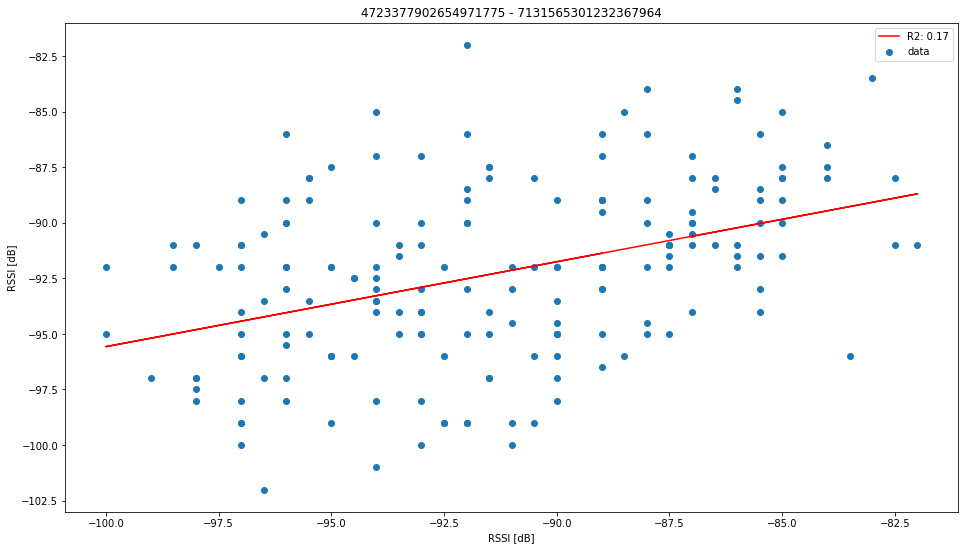

no correlation
[-97.0, -93.0, -97.5, -89.0, -87.0, -95.0, -93.0, -94.5, -89.0, -96.0, -97.0, -99.0, -92.5, -88.0, -91.5, -94.0, -96.0, -94.0, -95.0, -101.0, -88.0, -90.5, -91.0, -92.0, -90.5, -91.0, -97.0, -90.5, -94.0, -94.0, -96.0, -97.0, -85.0, -94.5, -85.0, -93.0, -88.0, -91.0, -92.5, -92.5, -96.0, -87.0, -89.0, -93.0, -94.0, -96.0, -90.0, -87.0, -95.5, -77.0, -79.5, -91.0, -91.0, -80.0, -90.5, -83.0, -80.5, -78.0, -81.5, -97.0, -94.0, -84.5, -83.0, -85.5, -80.0, -98.0, -89.0, -81.0, -91.0, -97.0, -81.0, -92.5, -91.0, -82.0, -82.0, -76.5, -88.0, -84.0, -86.5, -84.0, -83.0, -91.0, -83.0, -82.0, -91.0, -84.0, -86.0, -87.0, -89.5, -86.5, -88.5, -87.5, -84.0, -96.0, -92.5, -94.0, -99.0, -100.0, -96.5, -94.0, -94.0, -97.0, -101.0, -97.5, -101.5, -92.0, -96.0, -93.0, -96.0, -99.0, -96.0, -91.0, -99.0, -96.0, -98.0, -98.0, -93.0, -92.0, -93.5, -95.5, -98.0, -99.0, -93.0, -92.5, -94.0, -97.0, -98.5, -97.5, -94.0, -95.5, -95.0, -90.0, -94.0, -96.0, -98.5, -95.0, -96.0, -97.5, -94.0, -96.0, 

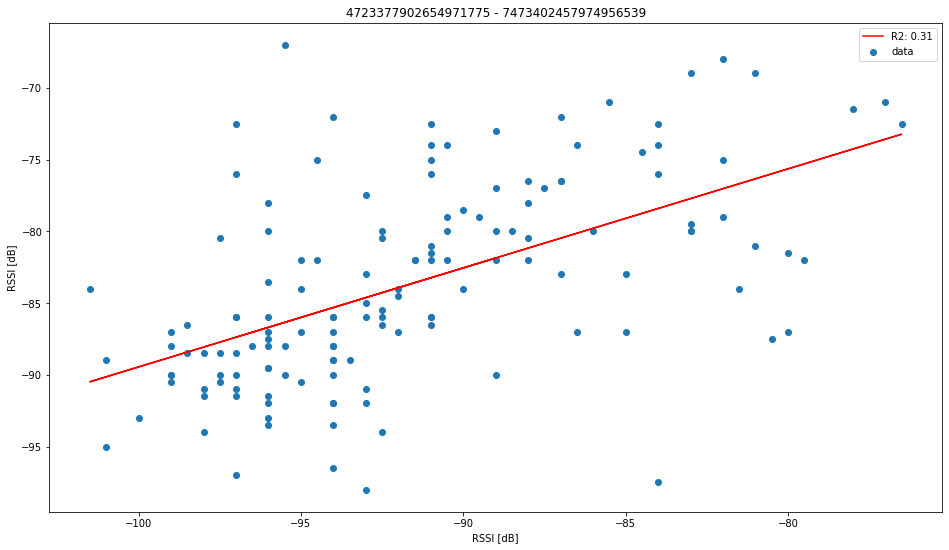

no correlation
[-92.0, -91.0, -91.5, -92.0, -95.0, -86.0, -89.0, -91.0, -92.5, -89.0, -90.0, -90.0, -90.0, -87.0, -95.0, -97.0, -94.0, -90.0, -88.5, -91.0, -93.0, -99.0, -99.0, -101.0, -92.0, -91.5, -97.0, -92.0, -92.0, -87.5, -88.0, -88.0, -90.0, -90.0, -94.5, -96.0, -102.0, -92.5, -94.0, -99.0, -92.0, -95.0, -87.0, -96.0, -96.0, -99.0, -97.0, -96.5, -89.0, -91.0, -90.0, -88.0, -93.0, -100.0, -91.0, -86.0, -88.0, -84.0, -96.0, -87.0, -91.5, -84.0, -89.0, -87.5, -88.0, -86.0, -91.0, -93.0, -100.0, -88.0, -91.0, -85.0, -96.0, -95.0, -90.0, -92.0, -84.5, -98.0, -98.0, -95.0, -91.5, -89.0, -87.5, -92.0, -96.0, -93.5, -94.5, -89.0, -90.5, -98.0, -97.5, -92.0, -89.0, -85.0, -86.5, -98.0, -90.0, -87.0, -85.0, -93.5, -92.0, -95.5, -100.0, -93.0, -93.5, -92.0, -82.0, -91.0, -95.0, -95.0, -89.0, -99.0, -93.0, -95.0, -92.0, -96.0, -88.5, -89.0, -92.0, -83.5, -88.0, -87.5, -95.0, -89.5, -88.5, -93.0, -97.0, -98.0, -97.0, -90.0, -92.0, -89.5, -91.5, -91.0, -88.0, -96.0, -91.0, -99.0, -90.5, -94.0,

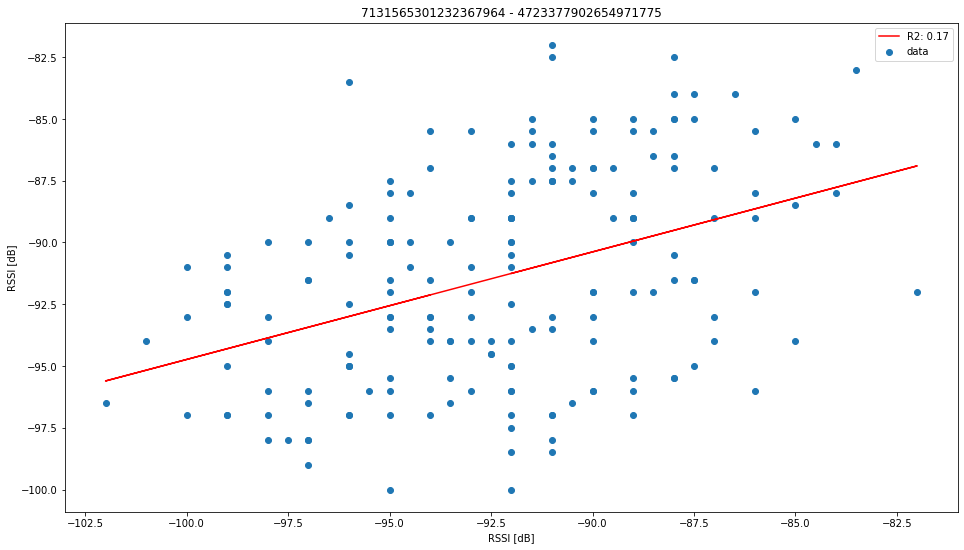

[-93.0, -96.0, -100.0, -96.0, -99.0, -94.0, -95.0, -98.0, -95.0, -99.0, -95.5, -89.0, -93.0, -90.0, -92.0, -92.0, -96.0, -99.0, -92.0, -94.0, -96.0, -96.5, -96.0, -99.0, -91.0, -97.0, -94.0, -95.0, -96.0, -101.0, -99.0, -98.0, -93.0, -91.0, -94.0, -85.0, -94.0, -92.5, -92.0, -86.0, -92.0, -85.0, -96.0, -96.0, -97.0, -93.5, -88.0, -90.0, -88.0, -88.0, -89.5, -92.0, -96.0, -94.0, -90.5, -97.0, -93.5, -94.0, -93.0, -89.5, -92.0, -94.5, -84.0, -95.0, -94.0, -88.0, -95.0, -95.0, -93.0, -89.5, -94.0, -89.0, -93.0, -92.0, -98.0, -95.0, -97.0, -94.0, -93.0, -96.0, -95.0, -97.0, -99.0, -98.0, -101.0, -98.0, -99.0, -97.0, -90.0, -91.0, -90.0, -90.0, -101.0, -96.0, -98.0, -96.0, -96.0, -96.0, -94.0, -98.0, -101.0, -99.0, -95.0, -88.5, -92.0, -92.0, -90.0, -92.0, -96.0, -100.0, -92.0, -93.0, -92.0, -93.0, -92.0, -98.0, -93.0, -97.0, -96.0, -95.0, -95.5, -95.0, -95.0, -98.0, -95.0, -97.5, -90.0, -99.0, -98.0, -87.0, -88.5, -92.0, -87.0, -94.0, -96.0, -93.0, -97.0, -94.5, -95.0, -95.0, -97.0, -98.0,

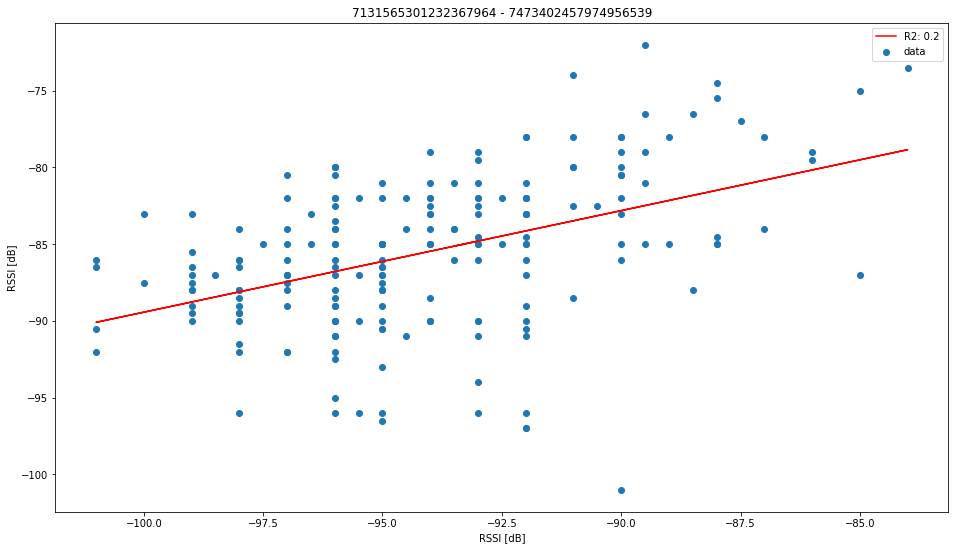

[-85.0, -80.0, -87.5, -84.0, -83.0, -83.0, -85.0, -90.0, -90.5, -86.5, -90.0, -85.0, -84.5, -85.0, -89.0, -91.0, -88.5, -88.0, -83.0, -90.0, -82.5, -83.0, -92.5, -85.5, -88.5, -87.0, -83.0, -89.0, -96.0, -86.0, -89.0, -89.5, -79.0, -74.0, -82.0, -75.0, -84.0, -85.0, -81.0, -79.0, -84.5, -87.0, -83.5, -80.0, -80.5, -86.0, -74.5, -80.5, -85.0, -85.0, -81.0, -86.0, -80.5, -79.0, -82.5, -82.0, -81.0, -82.5, -94.0, -76.5, -82.0, -82.0, -73.5, -82.0, -82.0, -84.5, -81.0, -85.0, -81.0, -72.0, -90.0, -78.0, -91.0, -87.0, -84.0, -88.0, -92.0, -88.5, -82.0, -90.0, -88.0, -92.0, -88.0, -86.0, -86.5, -89.5, -87.0, -87.5, -80.0, -80.0, -82.0, -79.0, -92.0, -91.0, -96.0, -86.0, -90.0, -90.0, -90.0, -91.5, -90.5, -89.5, -85.0, -88.0, -96.0, -97.0, -101.0, -90.0, -82.0, -83.0, -90.5, -96.0, -83.0, -83.0, -97.0, -88.5, -86.0, -86.0, -89.0, -90.0, -87.0, -87.0, -96.5, -92.0, -90.5, -85.0, -78.0, -90.0, -88.0, -84.0, -76.5, -78.0, -78.0, -85.0, -85.0, -85.0, -87.0, -91.0, -86.0, -87.5, -89.0, -88.0, -86.

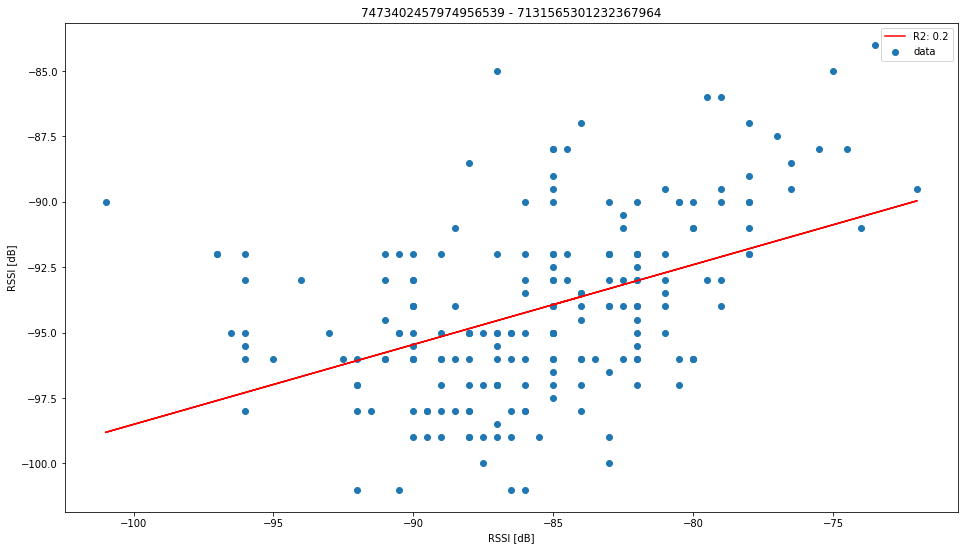

[-91.0, -92.0, -80.5, -77.0, -83.0, -84.0, -98.0, -82.0, -90.0, -91.5, -97.0, -90.5, -80.0, -76.5, -82.0, -89.0, -87.0, -87.0, -90.5, -95.0, -80.5, -79.0, -82.0, -84.5, -80.0, -86.0, -90.0, -82.0, -86.0, -96.5, -86.0, -76.0, -83.0, -75.0, -87.0, -77.5, -82.0, -86.0, -86.0, -94.0, -78.0, -76.5, -82.0, -86.0, -89.0, -93.0, -78.5, -72.0, -67.0, -71.0, -82.0, -81.0, -74.0, -81.5, -74.0, -69.0, -87.5, -71.5, -84.0, -86.0, -72.0, -74.5, -80.0, -71.0, -87.0, -94.0, -73.0, -81.0, -86.5, -72.5, -69.0, -80.5, -72.5, -75.0, -68.0, -72.5, -78.0, -74.0, -74.0, -72.5, -79.5, -76.0, -80.0, -79.0, -75.0, -76.0, -80.0, -76.5, -79.0, -87.0, -80.0, -77.0, -97.5, -89.5, -85.5, -93.5, -90.0, -93.0, -88.0, -92.0, -90.0, -91.5, -89.0, -90.5, -84.0, -87.0, -83.5, -91.0, -93.5, -87.0, -80.0, -81.5, -90.0, -88.0, -91.0, -88.5, -85.0, -84.0, -89.0, -90.0, -91.5, -88.0, -83.0, -86.5, -88.0, -88.5, -88.5, -88.5, -86.0, -88.0, -82.0, -84.0, -88.0, -87.5, -86.5, -87.0, -89.5, -90.0, -92.0, -92.0, -86.0, -82.0, -80.0

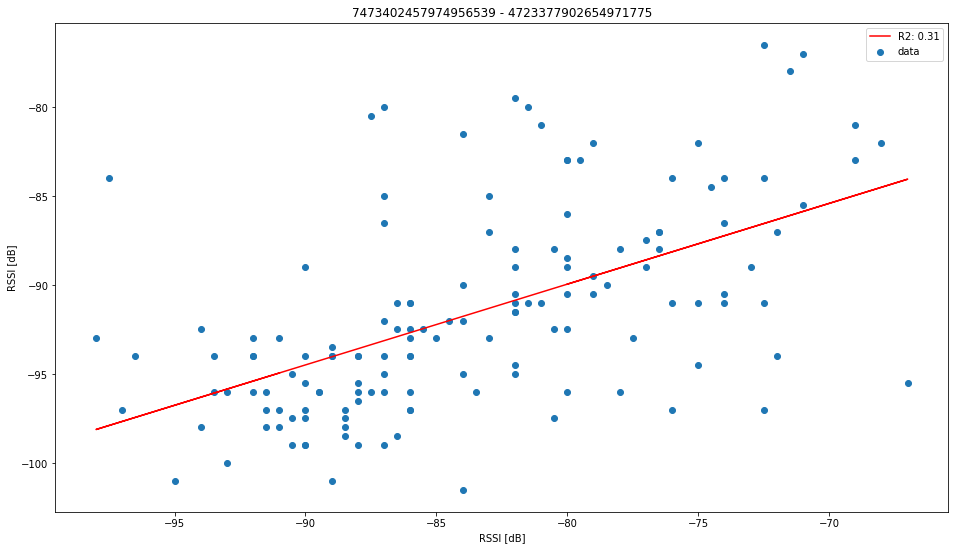

no correlation


In [ ]:
dict_dbcon = dict() #dizionario per raccoglioere i parametri di correlazione
for id in scan: dict_dbcon[id] = dict()

for id, ad in it.product(scan, adv):
  point = df_pair.loc[id,ad] #sezionare una coppia

  if not pd.isna(point):
    A,B = point #per ogni coppia
    print(A)
    print(B)
    print(point)
    Ax = np.array(A).reshape(-1,1)
    Bx = np.array(B).reshape(-1,1)
    reg = LinReg().fit(Ax,Bx) #regressione lineare
    print(reg)
    print(reg.coef_)
    print(reg.intercept_)
    scor = reg.score(Ax,Bx)
    dict_dbcon[id][ad] = [list(reg.coef_[0])[0],list(reg.intercept_)[0]] #salviamo i parametri dellla relazione lienare
    print(A[0] * reg.coef_[0] + reg.intercept_[0])
    print('R2: ',scor) 
    plt.scatter(Ax,Bx,label='data') #plottiamo
    plt.plot(Ax,reg.predict(Ax),'r-',label='R2: '+str(np.round(scor,2)))
    plt.title(str(id)+' - '+str(ad))
    plt.xlabel('RSSI [dB]')
    plt.ylabel('RSSI [dB]')
    plt.legend()
    plt.show()
  
  else: #se una coppia non ha punti, valori, gli diamo reg lin 1,0
    dict_dbcon[id][ad] = [1,0]
    print('no correlation')
  


In [ ]:
dict_dbcon #dizionario con coefficienti delle lin-reg

{4723377902654971775: {4723377902654971775: [1, 0],
  7131565301232367964: [0.3818189120918274, -57.39230079725639],
  7473402457974956539: [0.6901780179723968, -20.43449438835416]},
 7131565301232367964: {4723377902654971775: [0.4352637973398129,
   -51.20786246633967],
  7131565301232367964: [1, 0],
  7473402457974956539: [0.6622610860637657, -23.20843968562599]},
 7473402457974956539: {4723377902654971775: [0.4538888637878544,
   -53.642983840630876],
  7131565301232367964: [0.3052659664913534, -67.98241472279241],
  7473402457974956539: [1, 0]}}

In [ ]:
# il miglior candidato
# ovvero il device che ha visto più device differenti
leng=0
best=0
for i in range(len(scan)):
  adver_len=len(conn[conn.scanner==scan[i]].advertiser.unique())
  print(i, adver_len)
  if leng<adver_len:
    best=scan[i]
    leng=adver_len
    print(best)

0 2
4723377902654971775
1 2
2 2


In [ ]:
# normalizza gli rssi in base al migliore
base = best
#base = 3194881690607041580
conn['rssi_norm'] = conn.apply(lambda row: 
                               (row['rssi']*dict_dbcon[row['scanner']][base][0])+dict_dbcon[row['scanner']][base][1],axis=1)
conn.to_csv('connections_norm_test2.csv')
# ti salva un file nuovo, che puoi scaricare

In [ ]:
conn

,time,scanner,advertiser,power,rssi,rssi_norm
0,2022-02-23 10:45:42+00:00,4723377902654971775,7131565301232367964,-7,-94,-94.000000
1,2022-02-23 10:45:43+00:00,4723377902654971775,7131565301232367964,-7,-92,-92.000000
2,2022-02-23 10:45:44+00:00,4723377902654971775,7131565301232367964,-7,-100,-100.000000
3,2022-02-23 10:45:44+00:00,4723377902654971775,7131565301232367964,-7,-93,-93.000000
4,2022-02-23 10:45:44+00:00,4723377902654971775,7131565301232367964,-7,-97,-97.000000
...,...,...,...,...,...,...
6649,2022-02-23 11:02:14+00:00,7473402457974956539,4723377902654971775,-7,-90,-94.492982
6650,2022-02-23 11:02:14+00:00,7473402457974956539,7131565301232367964,-7,-79,-89.500204
6651,2022-02-23 11:02:14+00:00,7473402457974956539,4723377902654971775,-7,-93,-95.854648
6652,2022-02-23 11:02:15+00:00,7473402457974956539,4723377902654971775,-7,-95,-96.762426


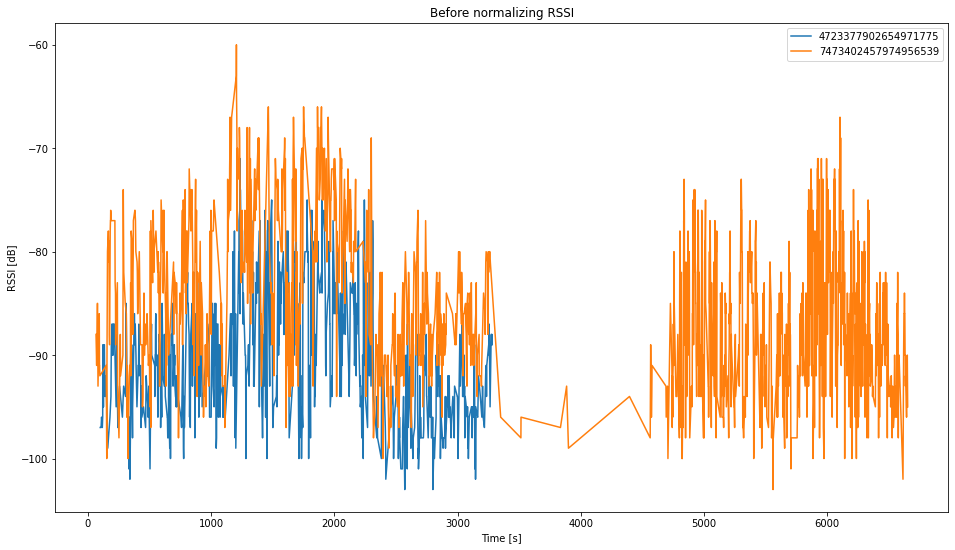

In [ ]:
A,B = best, scan[-1] # plot di una sezione pre'norma
conn[(conn.scanner==A)&(conn.advertiser==B)].rssi.plot(label=A)
conn[(conn.scanner==B)&(conn.advertiser==A)].rssi.plot(label=B)
plt.title('Before normalizing RSSI')
plt.xlabel('Time [s]')
plt.ylabel('RSSI [dB]')
plt.legend()
plt.show()

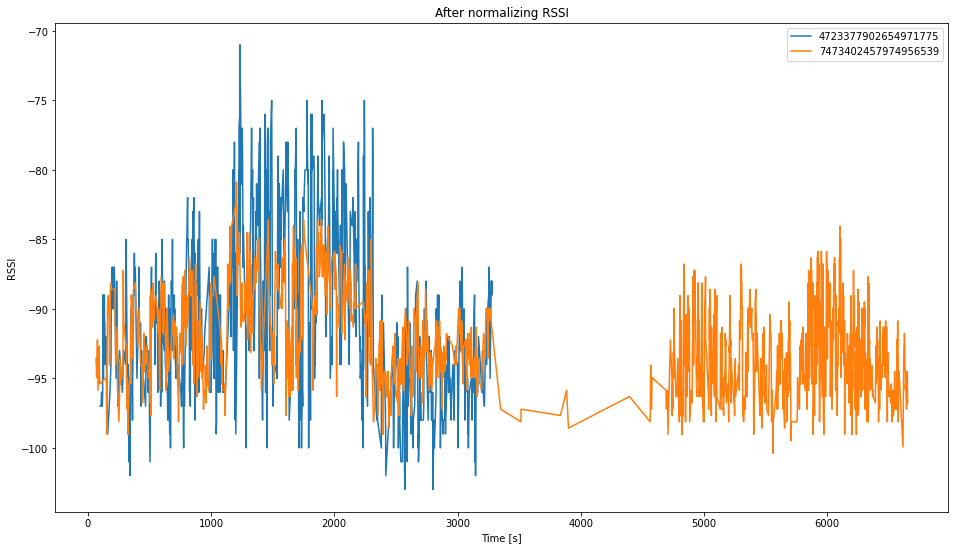

In [ ]:
A,B = best, scan[-1] # plot di una sezioen post'norma
conn[(conn.scanner==A)&(conn.advertiser==B)].rssi_norm.plot(label=A)
conn[(conn.scanner==B)&(conn.advertiser==A)].rssi_norm.plot(label=B)
plt.title('After normalizing RSSI')
plt.xlabel('Time [s]')
plt.ylabel('RSSI')
plt.legend()
plt.show()

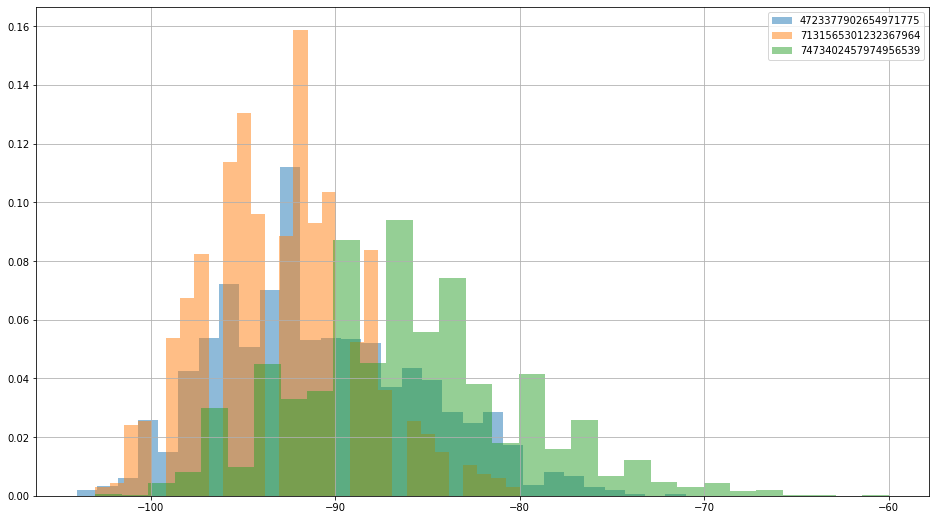

In [ ]:
for id in scan:
  conn[(conn.scanner==id)].rssi.hist(bins=30,alpha=0.5,density=True,label=id)
plt.legend()
plt.show()

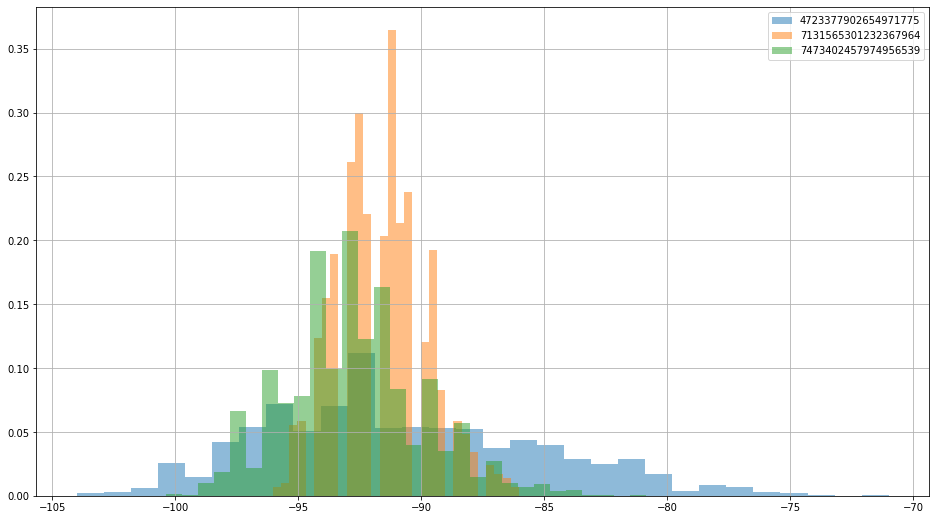

In [ ]:
for id in scan:
  conn[(conn.scanner==id)].rssi_norm.hist(bins=30,alpha=0.5,density=True,label=id)
plt.legend()
plt.show()

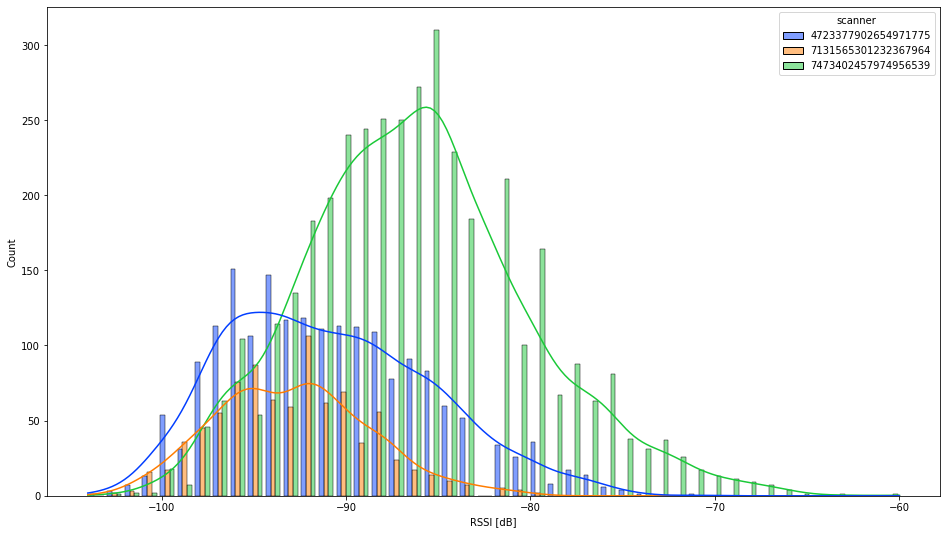

In [ ]:
sns.histplot(data=conn, x="rssi", hue="scanner", multiple="dodge", kde=True, shrink=.8, palette="bright")
plt.xlabel('RSSI [dB]')
plt.show()

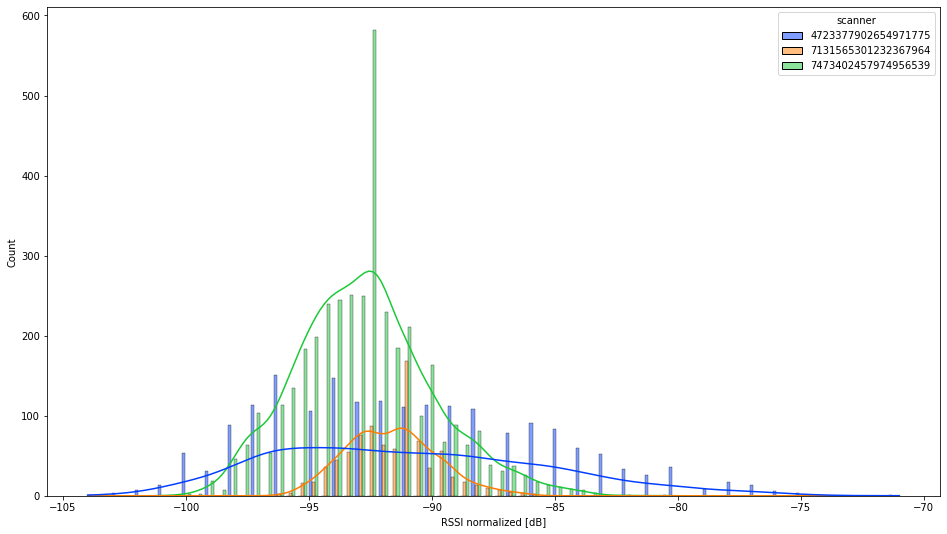

In [ ]:
sns.histplot(data=conn, x="rssi_norm", hue="scanner", multiple="dodge", kde=True, shrink=.8, palette="bright")
plt.xlabel('RSSI normalized [dB]')
plt.show()

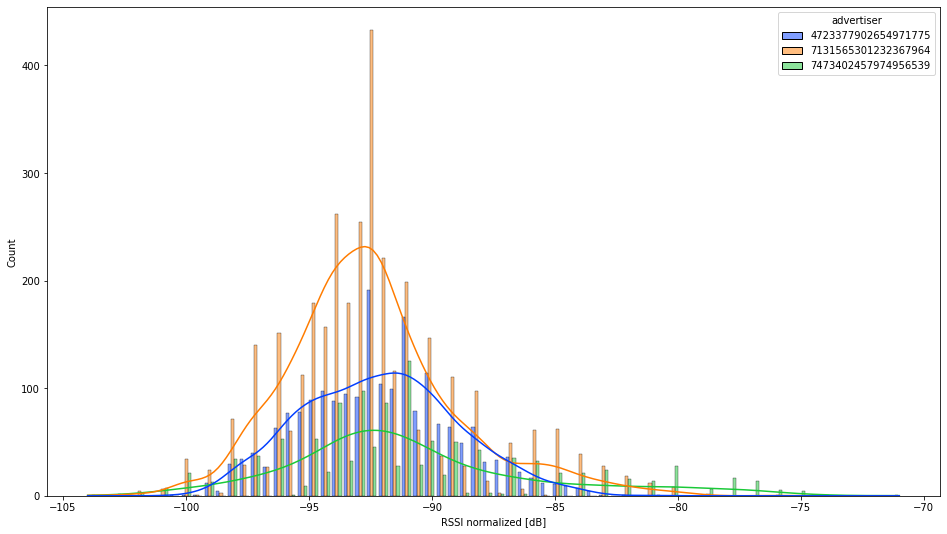

In [ ]:
sns.histplot(data=conn, x="rssi_norm", hue="advertiser", multiple="dodge", kde=True, shrink=.8, palette="bright")
plt.xlabel('RSSI normalized [dB]')
plt.show()

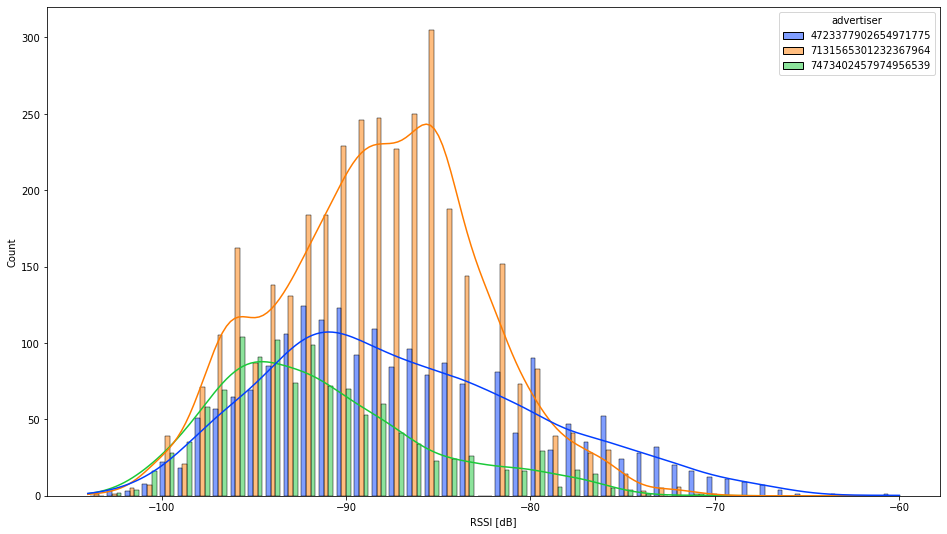

In [ ]:
sns.histplot(data=conn, x="rssi", hue="advertiser", multiple="dodge", kde=True, shrink=.8, palette="bright")
plt.xlabel('RSSI [dB]')
plt.show()